In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\iot\complex.csv")
df.head()

,time,s1,s2,s3
0,0,1.000000,2.00000,0.700000
1,1,1.010000,1.99995,0.707000
2,2,1.019999,1.99980,0.713999
3,3,1.029996,1.99955,0.720997
4,4,1.039989,1.99920,0.727993


In [3]:
print("Data Overview:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1008 non-null   int64  
 1    s1     1008 non-null   float64
 2    s2     1008 non-null   float64
 3    s3     1008 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.6 KB
None

Missing Values:
time    0
 s1     0
 s2     0
 s3     0
dtype: int64


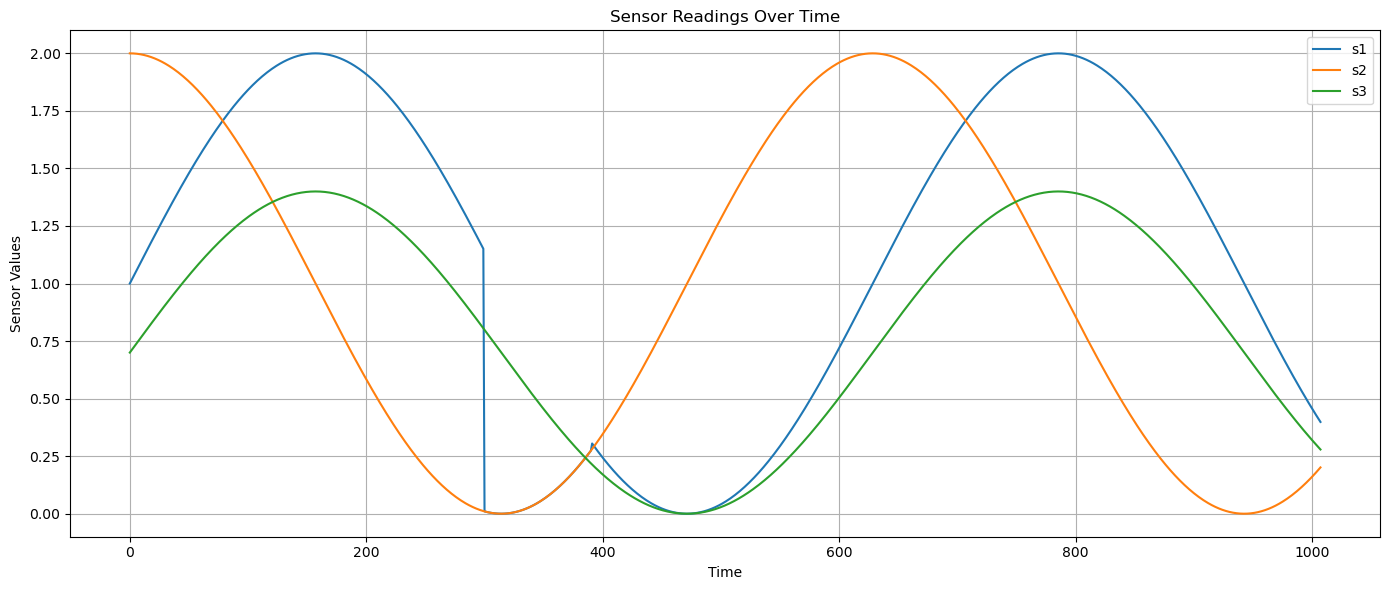

In [4]:
# Remove any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

# Plot sensor readings over time
plt.figure(figsize=(14, 6))

# List of columns to plot
sensor_cols = ['s1', 's2', 's3']

# Plot each sensor column if it exists in the DataFrame
for col in sensor_cols:
    if col in df.columns:
        plt.plot(df['time'], df[col], label=col)
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Add plot details
plt.legend()
plt.title("Sensor Readings Over Time")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.grid(True)
plt.tight_layout()
plt.show()



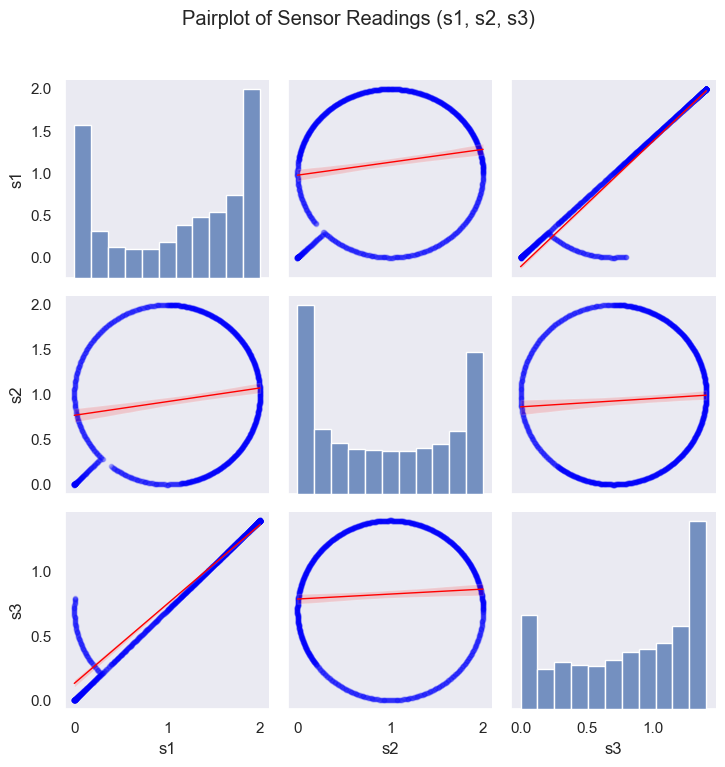

In [5]:
# Set seaborn theme
sns.set_theme(style="dark")

# Define columns to plot
sensor_cols = ['s1', 's2', 's3']

# Create pairplot
g = sns.pairplot(
    df[sensor_cols],
    kind='reg',
    diag_kind='auto',
    plot_kws={
        'scatter_kws': {'s': 10, 'alpha': 0.2, 'color': 'blue'},
        'line_kws': {'color': 'red', 'linewidth': 1}
    }
)

# Add title
g.fig.suptitle("Pairplot of Sensor Readings (s1, s2, s3)", y=1.02)
plt.tight_layout()
plt.show()



In [6]:
# Ensure 's1' and 's2' exist and are numeric
x = df['s1'] - df['s1'].mean()
y = df['s2'] - df['s2'].mean()

# Compute full cross-correlation
corr = np.correlate(x, y, mode='full')

# Create lags array
lags = np.arange(-len(x) + 1, len(x))

# Find lag where correlation is maximum
lag = lags[np.argmax(corr)]

print(f"Max correlation occurs at lag = {lag}")


Max correlation occurs at lag = 126


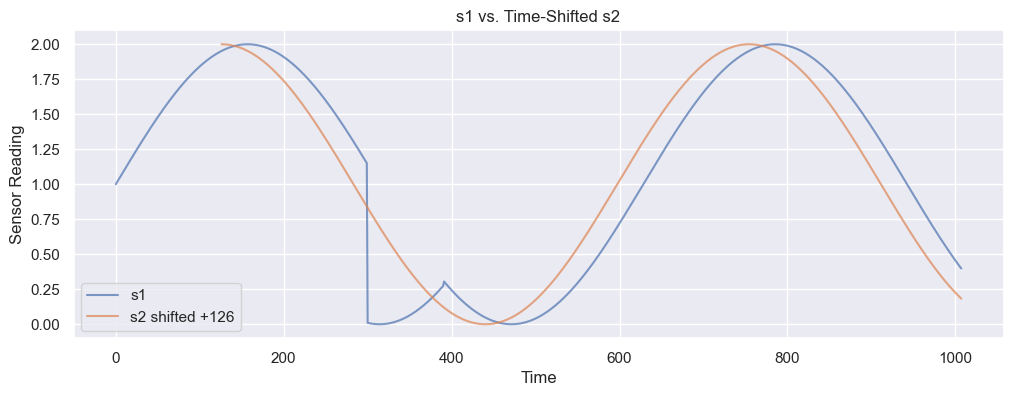

In [7]:
plt.figure(figsize=(12, 4))

# Plot s1
plt.plot(df['s1'], label='s1', alpha=0.7)

# Plot s2 shifted by +126
plt.plot(df['s2'].shift(126), label='s2 shifted +126', alpha=0.7)

# Add plot details
plt.legend()
plt.title('s1 vs. Time-Shifted s2')
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.grid(True)
plt.show()


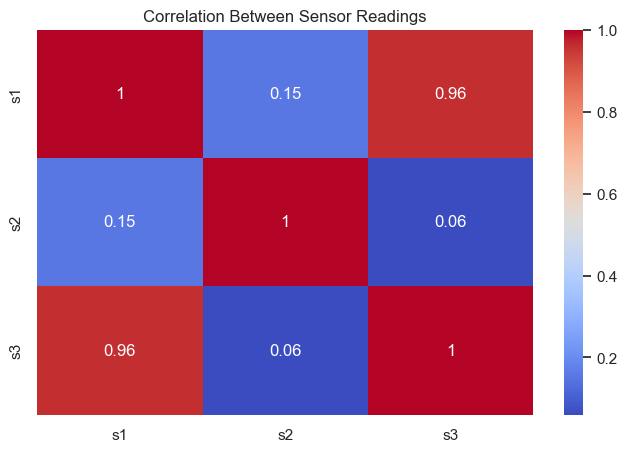

In [8]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[['s1', 's2', 's3']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Sensor Readings")
plt.show()
